In [2]:
import torch
import theseus as th
import matplotlib.pyplot as plt
import h5py
import math
import numpy as np
import pandas as pd
from scipy.interpolate import RectBivariateSpline

LOOKUP_TABLE = r'/Volumes/GoogleDrive/Shared drives/StranksLab/Personal Folders/Cullen Chosy/Code/theseus/data/lookup_table.csv'
h = 4.1357e-15
c = 2.9979e8
k = 8.6173e-5
q = 1.602e-19
T = 298.15
alpha = 10

nx = round(1.5 / 0.05) + 1
ny = round((100 + 60) / 0.1) + 1
d = pd.read_csv(LOOKUP_TABLE, names=['G'], usecols=[2])
theta = np.linspace(0.5, 2, nx)
theta_fine = np.linspace(0.5, 2, nx*50, dtype=np.float32)
energy = np.linspace(-60, 100, ny)
energy_fine = np.linspace(-60, 100, ny*50, dtype=np.float32)
d = np.reshape(d['G'].to_numpy(), (nx, ny))
G = RectBivariateSpline(theta, energy, d, kx=3, ky=3, s=0)
coeffs = G.get_coeffs()

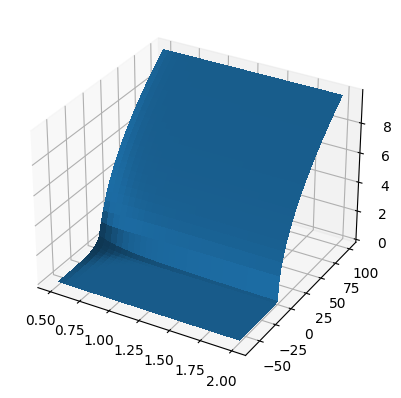

In [10]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
T, E = np.meshgrid(theta, energy)
surf = ax.plot_surface(T, E, d.T, linewidth=0, antialiased=False)